# 科比投篮数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold

/Users/zhangdi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
raw = pd.read_csv('../../dataSet/Kobe_Bryant_Short_Selection_data.csv')
print(raw.shape)
raw.head()

(30697, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
# 得到标签不为NaN的数据
kobe = raw[pd.notnull(raw['shot_made_flag'])]
print(kobe.shape)

(25697, 25)


Text(0.5,1,'lat and lon')

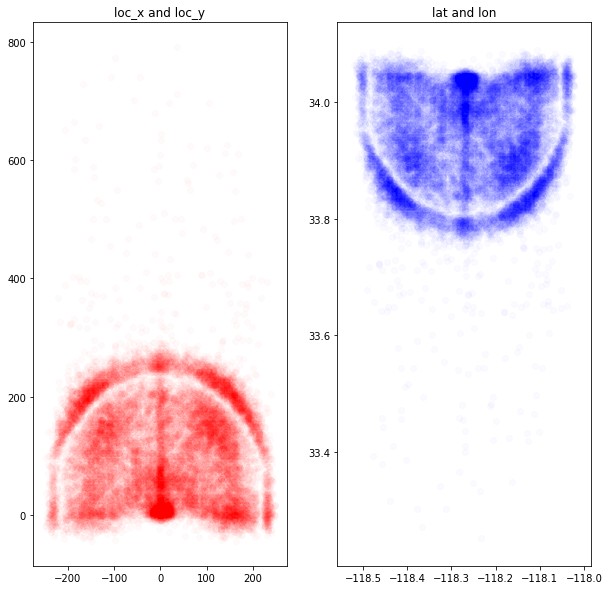

In [4]:
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y'
plt.subplot(121)
plt.scatter(kobe['loc_x'],kobe['loc_y'],c='r',alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122)
plt.scatter(kobe['lon'],kobe['lat'],c='b',alpha=alpha)
plt.title('lat and lon')

**对于强线性相关的多个特征，只需要保留其中之一即可**

In [5]:
raw['dist'] = np.sqrt(raw['loc_x']**2+raw['loc_y']**2)

loc_x_zero = raw['loc_x']==0

raw['angle'] = np.array([0]*len(raw))
raw['angle'][~loc_x_zero] = np.arctan(raw['loc_y'][~loc_x_zero]/raw['loc_x'][~loc_x_zero])
raw['angle'][loc_x_zero] = np.pi/2

/Users/zhangdi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zhangdi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
raw['remaining_time']=raw['minutes_remaining']*60+raw['seconds_remaining']

In [7]:
print(kobe['action_type'].unique()) #得到action_type有多少种类型
print(kobe['combined_shot_type'].unique()) #得到combined_shot_type有多少种类型
print(kobe['shot_type'].unique()) #得到shot_type有多少种类型
print(kobe['shot_type'].value_counts()) #得到shot_type中每个类型出现的次数

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback Dun

In [8]:
kobe['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [9]:
raw['season'] = raw['season'].apply(lambda x:int(x.split('-')[1])) #将season类中的内容使用计算结果替换
raw['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0])

In [10]:
print(kobe['team_id'].unique())
print(kobe['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [11]:
df_tmp = pd.DataFrame({'matchup':kobe['matchup'],'opponent':kobe['opponent']}) # 使用字serise创建dataframe
df_tmp.head()

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR


Text(0.5,1,'dist and shot_distance')

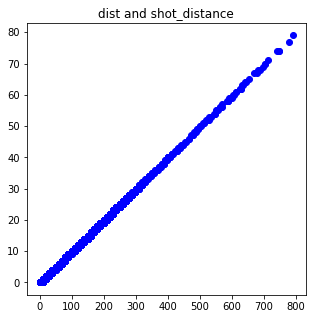

In [12]:
plt.figure(figsize=(5,5))

plt.scatter(raw['dist'],raw['shot_distance'],color='blue')
plt.title('dist and shot_distance')

In [13]:
gs = kobe.groupby('shot_zone_area') # 按照shot_zone_area字段group
print(kobe['shot_zone_area'].value_counts())
print(len(gs))

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64
6


In [14]:
import matplotlib.cm as cm

Text(0.5,1,'shot_zone_basic')

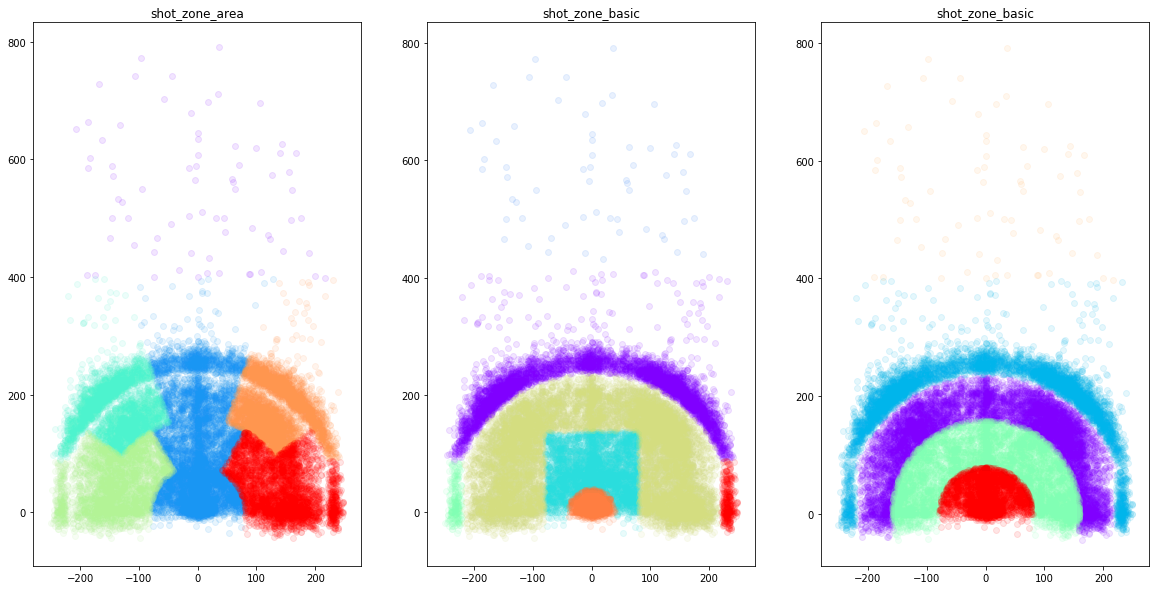

In [15]:
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = kobe.groupby(feat)
    cs = cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1]['loc_x'],g[1]['loc_y'],color=c,alpha=alpha)

plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_basic')

In [16]:
drops=['shot_id','team_id','team_name','shot_zone_area','shot_zone_range','shot_zone_basic','matchup','lon','lat','seconds_remaining','shot_distance','loc_x', 'loc_y','game_event_id','game_id','game_date']
raw.drop(drops,axis=1,inplace=True)# 删除指定的列明

In [17]:
print(raw['combined_shot_type'].value_counts())
pd.get_dummies(raw['combined_shot_type'],prefix='combined_shot_type',) # one-hot编码转换，get_dummies并不能修改原始数据集。需要重新赋值或合并
raw.head()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64


,action_type,combined_shot_type,minutes_remaining,period,playoffs,season,shot_made_flag,shot_type,opponent,dist,angle,remaining_time
0,Jump Shot,Jump Shot,10,1,0,1,NaN,2PT Field Goal,POR,181.859836,0.407058,627
1,Jump Shot,Jump Shot,10,1,0,1,0.0,2PT Field Goal,POR,157.000000,-0.000000,622
2,Jump Shot,Jump Shot,7,1,0,1,1.0,2PT Field Goal,POR,168.600119,-0.928481,465
3,Jump Shot,Jump Shot,6,1,0,1,0.0,2PT Field Goal,POR,222.865430,0.903063,412
4,Driving Dunk Shot,Dunk,6,2,0,1,1.0,2PT Field Goal,POR,0.000000,1.570796,379


In [18]:
categorical_vars = ['action_type','combined_shot_type','shot_type','opponent','period','season']
for var in categorical_vars:
    raw = pd.concat([raw,pd.get_dummies(raw[var],prefix=var)],axis=1) # concat 将两个dataframe进行拼接
    raw = raw.drop(var,1)

In [25]:
train_kobe = raw[pd.notnull(raw['shot_made_flag'])]
train_label = train_kobe['shot_made_flag']
train_kobe = train_kobe.drop(['shot_made_flag'],axis=1)

test_kobe = raw[pd.isnull(raw['shot_made_flag'])]
test_kobe = test_kobe.drop(['shot_made_flag'],axis=1)

In [22]:
from sklearn.metrics import confusion_matrix,log_loss
import time

In [24]:
range_m = np.logspace(0,2,num=5).astype(int) # 创造一个10^0 - 10^2 之间的等比数列，等比数列元素为5
range_m

array([  1,   3,  10,  31, 100])

In [33]:
print('Finding best n_estimators for RandomForestClassifier...') # 计算树的个数
min_score = 100000
best_n=0
scores_n=[]
range_n = np.logspace(0,2,num=3).astype(int)
for n in range_n:
    print('the number of trees : {0}'.format(n))
    t1 = time.time()
    
    rfc_score =0;
    rfc=RandomForestClassifier(n_estimators=n) #随机森林模型，n_estimators为使用多少个树
    for train_k,test_k in KFold(len(train_kobe),n_folds=10,shuffle=True): # 交叉验证，分成10份
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        
        pred=rfc.predict(train_kobe.iloc[test_k])
        rfc_score+=log_loss(train_label.iloc[test_k],pred)/10
    scores_n.append(rfc_score)
    if rfc_score<min_score:
        min_score = rfc_score
        best_n=n
    
    t2 = time.time()
    print('Done pocessing {0} trees ({1:.3f}sec)'.format(n,t2-t1))
print(best_n,min_score)
print('-------------')

print('Finding best max_depth for RandomForestClassifier...') # 计算最大深度
min_score=100000
best_m=0
scores_m=[]
range_m = np.logspace(0,2,num=3).astype(int)
for m in range_m:
    print('the max depth : {0}'.format(m))
    t1 = time.time()
    
    rfc_score=0
    rfc = RandomForestClassifier(max_depth=m,n_estimators=best_n)
    for train_k,test_k in KFold(len(train_kobe),n_folds=10,shuffle=True):
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        
        pred = rfc.predict(train_kobe.iloc[test_k])
        rfc_score+=log_loss(train_label.iloc[test_k],pred)/10
    scores_m.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_m=m
        
    t2 = time.time()
    print('Done processing {0} trees ({1:.3f}sec)'.format(m,t2-t1))
print(best_m,min_score)

Finding best n_estimators for RandomForestClassifier...
the number of trees : 1
Done pocessing 1 trees (0.810sec)
the number of trees : 10
Done pocessing 10 trees (4.523sec)
the number of trees : 100
Done pocessing 100 trees (45.324sec)
100 11.65054120449814
Finding best max_depth for RandomForestClassifier...
the max depth : 1
Done processing 1 trees (4.260sec)
the max depth : 10
Done processing 10 trees (13.695sec)
the max depth : 100
Done processing 100 trees (46.197sec)
10 11.004042414982315


Text(0.5,0,'max depth')

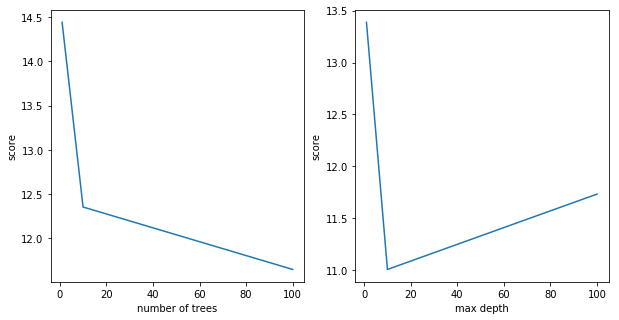

In [34]:
# 查看树的个数与最终匹配score值的关系图
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n,scores_n)
plt.ylabel('score')
plt.xlabel('number of trees')

# 查看最大深度与最终匹配score值的关系图
plt.subplot(122)
plt.plot(range_m,scores_m)
plt.ylabel('score')
plt.xlabel('max depth')

In [37]:
model = RandomForestClassifier(n_estimators=best_n,max_depth=best_m)
model.fit(train_kobe,train_label)
model.score(train_kobe,train_label)

0.6911312604584192